# Team 4 - TED Talks

![](https://psmarketingimages.s3.amazonaws.com/blog/wp-content/uploads/2017/04/23103819/TED-Talks-for-Small-Business-and-Entrepreneurs.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/rounakbanik/ted-talks)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- The `ratings` column is in dictionary format. How should we handle them?
- Same for `related_talks` and `tags` column
- Can you find the `year` of the talks?
- And more...

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json 
from wordcloud import WordCloud, STOPWORDS
from pandas.io.json import json_normalize
from google.colab import files

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


### Read data set

In [4]:
# Load data from file
data_to_load = files.upload()

Saving ted.csv to ted.csv


In [44]:
# read ted_data as data frame
ted_data = pd.read_csv('ted.csv')

In [ ]:
# Show all columns
ted_data.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [ ]:
# Show ted_data
ted_data

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.t

In [ ]:
# Number of records
len(ted_data)

2550

# About the columns in Ted data 

1.   **comments**: The number of first level comments made on the talk
2.   **description**: A blurb of what the talk is about
3.   **event**: The TED/TEDx event where the talk took place
4.   **film_date**: The Unix timestamp of the filming
5.   **languages**: The number of languages in which the talk is available
6.   **main_speaker**: The first named speaker of the talk
7.   **name**: The official name of the TED Talk. Includes the title and the speaker.
8.   **num_speaker**: The number of speakers in the talk
9.   **published_date**: The Unix timestamp for the publication of the talk on TED.com
10. **speaker_occupation**: The occupation of the main speaker.
11. **duration**: The duration of the talk in seconds.
12. **tags**: The themes associated with the talk.
13. **ratings**: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
14. **related_talks**: A list of dictionaries of recommended talks to watch next.
15. **url**: The URL of the talk.
16. **views**: The number of views on the talk.
17. **title**: The title of the talk

# Convert UNIX timestamp to common time

In [45]:
import datetime
ted_data['film_date'] = ted_data['film_date'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))
ted_data['published_date'] = ted_data['published_date'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))

In [19]:
# show top 10 ted's data after converting datetime
ted_data.head(10)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,25-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,24-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,26-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,27-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,22-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,02-02-2006,36,Tony Robbins,Tony Robbins: Why we do what we do,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401
6,919,When two young Mormon missionaries knock on Ju...,992,TED2006,24-02-2006,31,Julia Sweeney,Julia Sweeney: Letting go of God,1,10-07-2006,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,https://www.ted.com/talks/julia_sweeney_on_let...,3769987
7,46,Architect Joshua Prince-Ramus takes the audien...,1198,TED2006,23-02-2006,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,10-07-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...","[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741
8,852,Philosopher Dan Dennett calls for religion -- ...,1485,TED2006,02-02-2006,32,Dan Dennett,Dan Dennett: Let's teach religion -- all relig...,1,18-07-2006,"[{'id': 3, 'name': 'Courageous', 'count': 562}...","[{'id': 71, 'hero': 'https://pe.tedcdn.com/ima...","Philosopher, cognitive scientist","['God', 'TED Brain Trust', 'atheism', 'brain',...",Let's teach religion -- all religion -- in sch...,https://www.ted.com/talks/dan_dennett_s_respon...,2567958
9,900,"Pastor Rick Warren, author of ""The Purpose-Dri...",1262,T

# Show top 30 most unpopular and popular ted talks of all time

In [ ]:
pop_talks = ted_data[['title', 'main_speaker', 'views', 'film_date', 'tags']].sort_values('views', ascending=False)[:30]
pop_talks

,title,main_speaker,views,film_date,tags
0,Do schools kill creativity?,Ken Robinson,47227110,25-02-06,"['children', 'creativity', 'culture', 'dance',..."
1346,Your body language may shape who you are,Amy Cuddy,43155405,26-06-12,"['body language', 'brain', 'business', 'psycho..."
677,How great leaders inspire action,Simon Sinek,34309432,17-09-09,"['TEDx', 'business', 'entrepreneur', 'leadersh..."
837,The power of vulnerability,Brené Brown,31168150,06-06-10,"['TEDx', 'communication', 'culture', 'depressi..."
452,10 things you didn't know about orgasm,Mary Roach,22270883,06-02-09,"['books', 'culture', 'history', 'humor', 'scie..."
1776,How to speak so that people want to listen,Julian Treasure,21594632,10-06-13,"['culture', 'sound', 'speech']"
201,My stroke of insight,Jill Bolte Taylor,21190883,27-02-08,"['biology', 'brain', 'consciousness', 'global ..."
5,Why we do what we do,Tony Robbins,20685401,02-02-06,"['business', 'culture', 'entertainment', 'goal..."
2114,This is what happens when you reply to spam email,James Veitch,20475972,08-12-15,"['comedy', 'communication', 'curiosity', 'humo..."
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,27-10-12,"['TEDx', 'beauty', 'culture', 'fashion', 'phot..."


In [ ]:
unpop_talks = ted_data[['title', 'main_speaker', 'views', 'film_date', 'tags']].sort_values('views', ascending=True)[:30]
unpop_talks

,title,main_speaker,views,film_date,tags
594,Stories of Haiti,Edwidge Danticat,50443,13-10-04,"['books', 'disaster relief', 'novel', 'poetry'..."
1112,The debut of the British Paraorchestra,Charles Hazlewood + British Paraorchestra,66668,22-11-11,"['TEDx', 'disability', 'entertainment', 'globa..."
237,"""Kounandi""",Rokia Traore,82488,06-06-07,"['Africa', 'guitar', 'live music', 'music', 's..."
776,The early birdwatchers,Tim Birkhead,112321,18-09-09,"['biology', 'birds', 'evolution', 'life']"
1133,Let's bridge the digital divide!,Aleph Molinari,115346,06-08-11,"['TEDx', 'global issues', 'poverty', 'technolo..."
1229,Beethoven the businessman,José Bowen,117756,03-12-11,"['TEDx', 'business', 'history', 'music']"
1141,Deaf in the military,Keith Nolan,120274,23-04-11,"['TEDx', 'disability', 'global issues', 'milit..."
1079,Don't misrepresent Africa,Leslie Dodson,121186,24-09-11,"['Africa', 'TEDx', 'journalism', 'media', 'pov..."
1104,"Change our culture, change our world",Nate Garvis,125050,13-10-10,"['TEDx', 'culture', 'politics']"
1178,Beautiful artificial limbs,Scott Summit,132199,19-11-11,"['TEDx', 'beauty', 'design', 'industrial desig..."


Ken Robinson's talk on Do Schools Kill Creativity? is the most popular TED Talk of all time with about 47.2 million views.

# Let's use Seaborn to draw a barchart


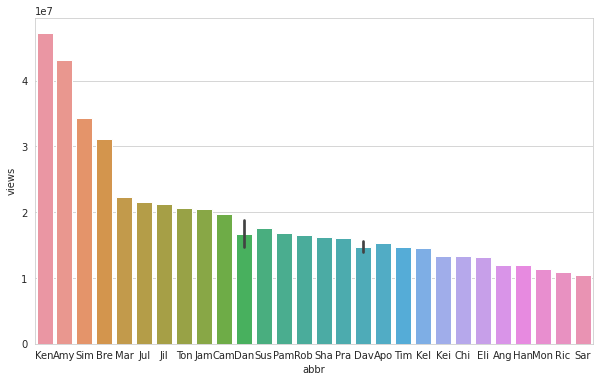

In [ ]:
# Take abbreviation version of main speaker
pop_talks['abbr'] = pop_talks['main_speaker'].apply(lambda x : x[:3])
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.barplot(x = 'abbr', y = 'views', data = pop_talks)

Review the distribution of views in ted talks

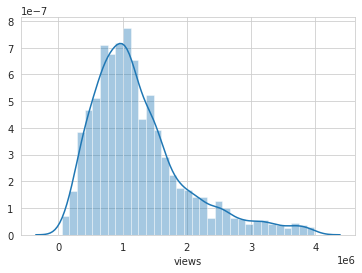

In [ ]:
#Review the distribution of views in ted talks
sns.distplot(ted_data[ted_data['views'] < 4000000]['views'])


In [ ]:
ted_data['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

We can see that the average number of views on Ted Talks is about 1.6 million

# Comments analytics

In [ ]:
ted_data['comments'].describe()

A video in ted talk has about 192 comments


In [ ]:
# distribution of comments
sns.distplot(ted_data[ted_data['comments'] < 500]['comments'])

In [ ]:
# Correlation between views and comments
ted_data[['views', 'comments']].corr()

We can see that the correlation between views and comments is greater than 0, so most viewed ted talks generally have greater number of comments.

In [ ]:
#  Plot between views and comments
sns.jointplot(x = 'views', y = 'comments', data = ted_data)

Top 10 Ted Talks having the greatest number of comments

In [13]:
ted_data[['title', 'main_speaker', 'views', 'comments']].sort_values('comments', ascending=False).head(10)

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


# Let's find out which talks tend to attract the largest amount of discussion

In [14]:
ted_data['dis_quo'] = ted_data['comments']/ted_data['views']

Top 10 discussion quotient

In [15]:
ted_data[['title', 'main_speaker', 'views', 'comments', 'dis_quo', 'film_date']].sort_values('dis_quo', ascending=False).head(10)

,title,main_speaker,views,comments,dis_quo,film_date
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220,02-12-09
803,E-voting without fraud,David Bismark,543551,834,0.001534,14-07-10
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464,02-02-02
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421,10-02-10
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360,03-03-11
840,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285,10-10-10
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264,08-12-10
1787,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236,18-03-14
661,The danger of science denial,Michael Specter,1838628,2272,0.001236,11-02-10
561,Dance to change the world,Mallika Sarabhai,481834,595,0.001235,04-11-09


# Analysing Ted Talks by the month of the year

In [10]:
def getday(x):
    day, month, year = (int(i) for i in x.split('-'))    
    answer = datetime.date(year, month, day).weekday()
    return day_order[answer]

In [8]:
ted_data['month'] = ted_data['film_date'].apply(lambda x: month_order[int(x.split('-')[1])-1])
month_df = pd.DataFrame(ted_data['month'].value_counts()).reset_index()
month_df.columns = ['months', 'talks']

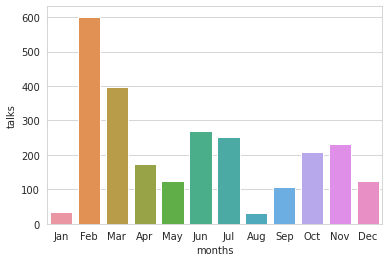

In [ ]:
sns.barplot(x='months', y='talks', data=month_df, order=month_order)

February is the most popular month for Ted talks, while January and August are the least popular months


Visualize the number of ted talks through the years

In [20]:
ted_data['year'] = ted_data['film_date'].apply(lambda x: x.split('-')[2])
year_df = pd.DataFrame(ted_data['year'].value_counts().reset_index())
year_df.columns = ['year', 'talks']

Draw the plot

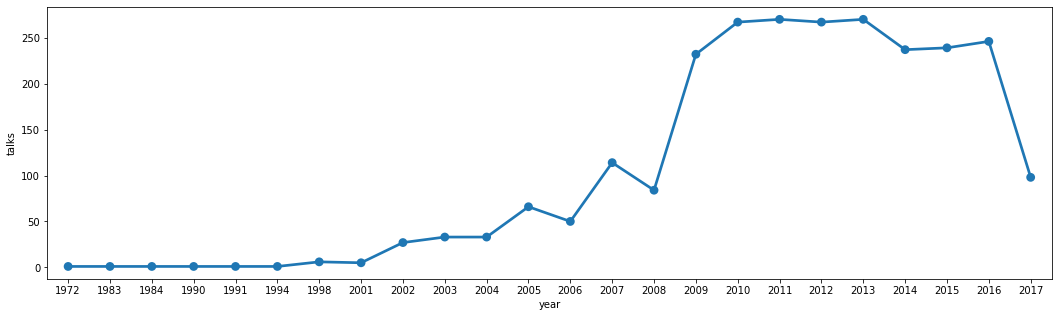

In [21]:
plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='talks', data = year_df)

# Working with Ted Ratings

In [35]:
ted_data.iloc[0]['ratings']

[{'count': 19645, 'id': 7, 'name': 'Funny'},
 {'count': 4573, 'id': 1, 'name': 'Beautiful'},
 {'count': 6073, 'id': 9, 'name': 'Ingenious'},
 {'count': 3253, 'id': 3, 'name': 'Courageous'},
 {'count': 387, 'id': 11, 'name': 'Longwinded'},
 {'count': 242, 'id': 2, 'name': 'Confusing'},
 {'count': 7346, 'id': 8, 'name': 'Informative'},
 {'count': 10581, 'id': 22, 'name': 'Fascinating'},
 {'count': 300, 'id': 21, 'name': 'Unconvincing'},
 {'count': 10704, 'id': 24, 'name': 'Persuasive'},
 {'count': 4439, 'id': 23, 'name': 'Jaw-dropping'},
 {'count': 1174, 'id': 25, 'name': 'OK'},
 {'count': 209, 'id': 26, 'name': 'Obnoxious'},
 {'count': 24924, 'id': 10, 'name': 'Inspiring'}]

In [46]:
import ast
ted_data['ratings'] = ted_data['ratings'].apply(lambda x: ast.literal_eval(x))
ted_data['ratings']

0       [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1       [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2       [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3       [{'id': 3, 'name': 'Courageous', 'count': 760}...
4       [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
                              ...                        
2545    [{'id': 3, 'name': 'Courageous', 'count': 24},...
2546    [{'id': 22, 'name': 'Fascinating', 'count': 32...
2547    [{'id': 1, 'name': 'Beautiful', 'count': 14}, ...
2548    [{'id': 11, 'name': 'Longwinded', 'count': 3},...
2549    [{'id': 21, 'name': 'Unconvincing', 'count': 2...
Name: ratings, Length: 2550, dtype: object

In [37]:
ted_data['fascinating'] = ted_data['ratings'].apply(lambda x:x[-4]['count'])
ted_data['jawdrop'] = ted_data['ratings'].apply(lambda x: x[-3]['count'])
ted_data['beautiful'] = ted_data['ratings'].apply(lambda x: x[3]['count'])
ted_data['confusing'] = ted_data['ratings'].apply(lambda x: x[2]['count'])
ted_data.head() 

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,year,fascinating,jawdrop,beautiful,confusing
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,4439,1174,3253,6073
1,265,With the same humor and humanity he exuded in ...,977,TED2006,25-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006,268,116,58,62
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,24-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2006,146,230,60,183
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,26-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,27-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,2006,460,230,59,32
4,593,You've never seen data presented like this. Wi...,1190,TED2006,22-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,2006,3736,2542,318,942


Most Fascinating talks of all time

In [38]:
ted_data[['title', 'main_speaker', 'views', 'published_date', 'fascinating']].sort_values('fascinating', ascending=False)[:15]

,title,main_speaker,views,published_date,fascinating
108,How PhotoSynth can connect the world's images,Blaise Agüera y Arcas,4772595,27-05-2007,14728
168,"A performance of ""Mathemagic""",Arthur Benjamin,8360707,13-12-2007,7196
117,New insights on poverty,Hans Rosling,3243784,25-06-2007,5137
13,The radical promise of the multi-touch interface,Jeff Han,4531020,01-08-2006,4643
0,Do schools kill creativity?,Ken Robinson,47227110,27-06-2006,4439
1163,The power of introverts,Susan Cain,17629275,02-03-2012,3944
4,The best stats you've ever seen,Hans Rosling,12005869,27-06-2006,3736
30,The paradox of choice,Barry Schwartz,10000702,26-09-2006,2478
96,Militant atheism,Richard Dawkins,4374792,16-04-2007,2475
5,Why we do what we do,Tony Robbins,20685401,27-06-2006,2423


#Ted tags

In [48]:
ted_data['tags'] = ted_data['tags'].apply(lambda x: ast.literal_eval(x))

In [49]:
theme = ted_data.apply(lambda x: pd.Series(x['tags']), axis=1).stack().reset_index(level=1, drop=True)
theme.name = 'theme'

In [50]:
theme_df = ted_data.drop('tags', axis=1).join(theme)
theme_df.head(10)


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,title,url,views,theme
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,children
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,creativity
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,culture
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,dance
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,education
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,parenting
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,teaching
1,265,With the same humor and humanity he exuded in ...,977,TED2006,25-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,alternative energy
1,265,With the same humor and humanity he exuded in ...,977,TED2006,25-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,cars
1,265,With the same humor and humanity he exuded in ...,977,TED2006,25-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,climate change


In [55]:
# Top 10 most popular theme in Ted talks 
top_pop_themes = pd.DataFrame(theme_df['theme'].value_counts()).reset_index()
top_pop_themes.columns = ['theme', 'talks']
top_pop_themes.head(10)

,theme,talks
0,technology,727
1,science,567
2,global issues,501
3,culture,486
4,TEDx,450
5,design,418
6,business,348
7,entertainment,299
8,health,236
9,innovation,229


Let's show the plot of top most popular themes in Ted talks

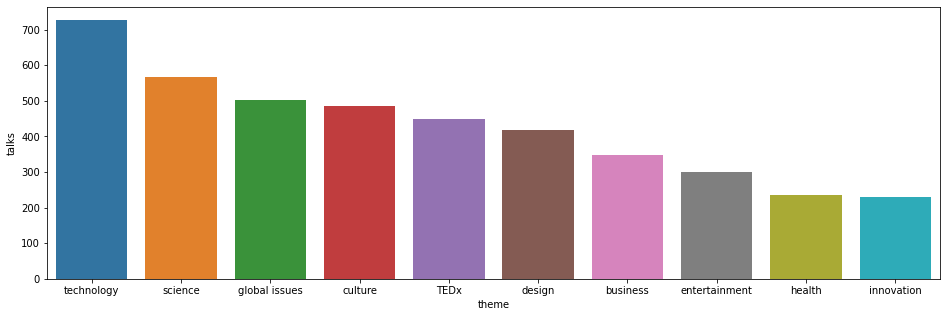

In [57]:
plt.figure(figsize=(16,5))
sns.barplot(x='theme', y='talks', data=top_pop_themes.head(10))
plt.show()